__Leap frog method  vs.Bulirsch Stoer methods__

LF method: Symmetry in time. deterministic. perserves energy
Complexity: O(h^2)
error: O(h^3)
need energy conservation, still approx 

RK 4 is good for short period calculation, on time average LF better
but short scale LF oscillates a lot 

BS method is best method for smooth/Slowly varying system

__ODE boundary solvers__
shooting method or eval approach

shooting method
 - use some initial guess and use a ODE solve to generate an emsemble of solutions 
 - find the roots to the initial value problem


Make modifications to the code. 
1. set the parameter to mars

In [76]:
# Exercise 8.7
from math import sin, pi
from numpy import zeros, array, arange
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import plot, show
from scipy.integrate import odeint


In [ ]:
Mars = {'g':3.71, 'rho': 0.20}
Earth = {'g':9.81, 'rho': 0.08}

In [62]:
g = 9.81
a = 0
b = 10
N = 1000
H = (b-a)/N
delta = 1e-8
C = 0.47
rho = 1.22
R = 0.08
m = 1
def f(r, m):
    vx = r[0]
    vy = r[1]
    x = r[2]
    y = r[3]
    
    k = pi * R**2 * rho * C /(2*m)
    fvx = -k * vx * np.sqrt(vx**2 + vy**2) 
    fvy = -k * vy * np.sqrt(vx**2 + vy**2) -g
    fx = vx + fvx * t
    fy = vy + fvy * t
    return array([fvx, fvy, fx, fy])

endpt = []
r = array([100* np.sin(np.deg2rad(30)), 
              100* np.cos(np.deg2rad(30)), 0, 0])
tpoints = np.arange(a,b, H)

#T steps loop integrations
for t in tpoints:
    endpt.append(r[2:])
    
    #Midpoints
    n =1
    r1 = r  + 0.5* H * f(r, m)
    r2 = r + H * f(r1,m)
    
    R1 = zeros((1,4))
    R1[0] = .5 * (r1 + r2 + 0.5 * H * f(r2, m))
    error = 2 * H * delta
    while error > H * delta:
        n+=1
        h = H/n
        
        r1 = r + 0.5* h *f(r, m)
        r2 = r + h * f(r1, m)
        for i in range(n-1):
            r1+=h * f(r2, m)
            r2+= h * f(r1, m)
        R2 = R1
        R1 = zeros([n,4])
        R1[0] = 0.5 * (r1 + r2 + 0.5 * h * f(r2, m))
        for m in range(1,n):
            epsilon = (R1[m-1] - R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])
    r = R1[n-1]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:54: RuntimeWarning: overflow encountered in subtract
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in subtract
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:55: RuntimeWarning: overflow encountered in add


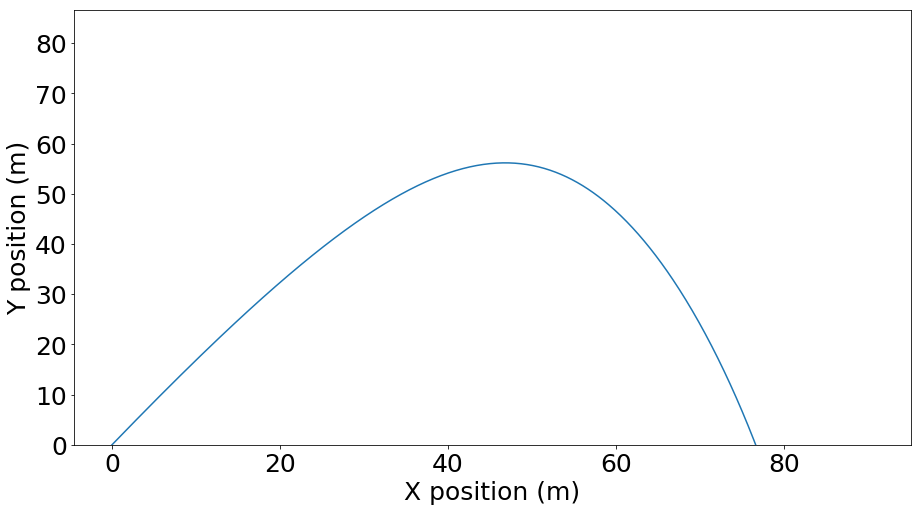

In [77]:
g = 9.81
a = 0
b = 10
N = 1000
H = (b-a)/N
delta = 1e-8
C = 0.47
rho = 1.22
R = 0.08
m = 1

def f(r, t, m):
    vx = r[0]
    vy = r[1]
    x = r[2]
    y = r[3]
    
    k = pi * R**2 * rho * C /(2*m)
    fvx = -k * vx * np.sqrt(vx**2 + vy**2) 
    fvy = -k * vy * np.sqrt(vx**2 + vy**2) -g
    fx = vx + fvx * t
    fy = vy + fvy * t
    return array([fvx, fvy, fx, fy])

r = array([100* np.sin(np.deg2rad(30)), 
              100* np.cos(np.deg2rad(30)), 0, 0])
tpoints = np.arange(a,b, H)

sol = odeint(f, r, tpoints, args = (m,))

plt.figure(figsize=(15,8))
plt.plot(sol[:,2], sol[:,3])
plt.ylim(0, sol[:3].max())
plt.xlabel('X position (m)',fontsize = 25)
plt.ylabel('Y position (m)',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.savefig('lec11_partb.png')
plt.show()

In [65]:
# np.shape(endpt[:,0])

56.14587560830344
150.00672414811513
166.55466588995358
173.58909003548845
177.48951313835087
179.969949978579
181.6867877804034
182.9457571780731
183.90833342915784
184.66847435226438


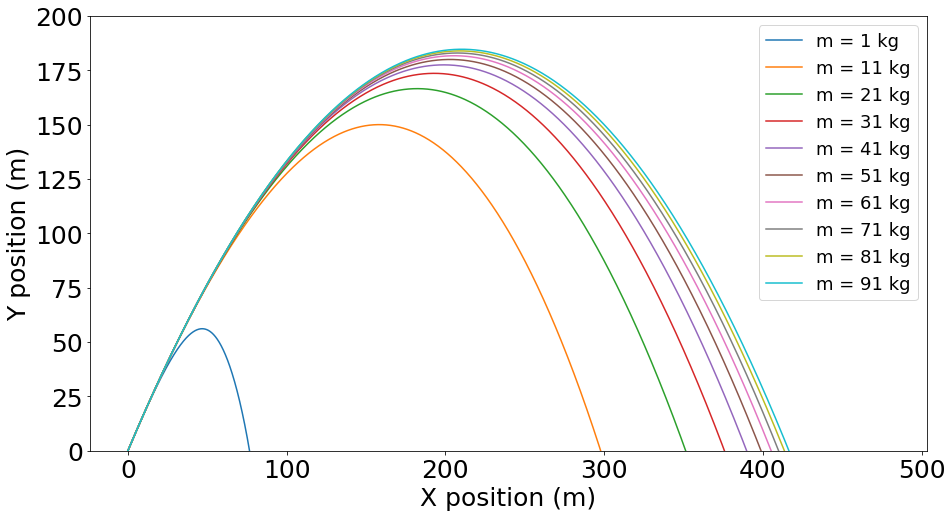

In [105]:
m_arr = np.arange(1, 100, 10)
import matplotlib.cm as cmx
import matplotlib.colors as colors

jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=m_arr[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

plt.figure(figsize=(15,8))
plt.xlabel('X position (m)',fontsize = 25)
plt.ylabel('Y position (m)',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
for i in m_arr:
    m = i
    solm = odeint(f, r, tpoints, args = (m,))
    print(solm[:,3].max())
    plt.plot(solm[:,2], solm[:,3], label = 'm = %.0f kg'%(m))
    
plt.legend(fontsize=18)
plt.ylim(0, 200)
plt.savefig('lec11_partc.png')
plt.show()

In [40]:
np.sin(np.deg2rad(30))

0.49999999999999994

In [80]:
solm[:3].max()

86.60254037844388

In [ ]:
ode.set_integrator